# Step 1
# Data Collecting
- Data_Science_Case_Study

In [97]:
# Import labraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Data Exploration

In [98]:
#import dataset
SPY_data = pd.read_csv("SPY_2015.csv")

# Preview the data 
SPY_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/7/2015,2090.419922,2090.419922,2066.780029,2077.070068,2077.070068,4043820000
1,12/4/2015,2051.239990,2093.840088,2051.239990,2091.689941,2091.689941,4214910000
2,12/3/2015,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000
3,12/2/2015,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000
4,12/1/2015,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000
5,11/30/2015,2090.949951,2093.810059,2080.409912,2080.409912,2080.409912,4245030000
6,11/27/2015,2088.820068,2093.290039,2084.129883,2090.110107,2090.110107,1466840000
7,11/25/2015,2089.300049,2093.000000,2086.300049,2088.870117,2088.870117,2852940000
8,11/24/2015,2084.419922,2094.120117,2070.290039,2089.139893,2089.139893,3884930000
9,11/23/2015,2089.409912,2095.610107,2081.389893,2086.590088,2086.590088,3587980000


In [99]:
# change thr data column from object to datetime object
SPY_data["Date"] = pd.to_datetime(SPY_data["Date"])
SPY_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,2077.070068,4043820000
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,2091.689941,4214910000
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000
5,2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,2080.409912,4245030000
6,2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,2090.110107,1466840000
7,2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2088.870117,2852940000
8,2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,2089.139893,3884930000
9,2015-11-23,2089.409912,2095.610107,2081.389893,2086.590088,2086.590088,3587980000


# Step 3
# Data Cleaning and Transformation
- Indexing and Sorting

In [100]:
# set date as index
SPY_data.set_index('Date', inplace=True)

# Reverse the order of the dataframe in order to have the oldest values at top

SPY_data.sort_values('Date' ,ascending = True)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000


- Check Null Values

In [101]:
# Take the name of the column of the SPY_data to see if null values exist
df = SPY_data.columns
SPY_data.isnull().sum().loc[df]

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Step 4
# Exploratory Data Analysis

In [102]:
# Correlation
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

def corr(df ,variables, n_rows, n_cols):
    fig= plt.figure(figsize=(8,6))

#Is there any correlation between volume and Adj Close price
    for i , var in enumerate(variables):
      ax = fig.add_subplot(n_rows, n_cols , i+1) 
      asset= df.loc[: , var]
      ax.scatter(df["Adj Close"], asset , c= next(colors))
      ax.set_xlabel("Adj Close")
      ax.set_ylabel("{}".format(var))
      ax.set_title(var +"vs price")
      fig.tight_layout()
      plt.show()
    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


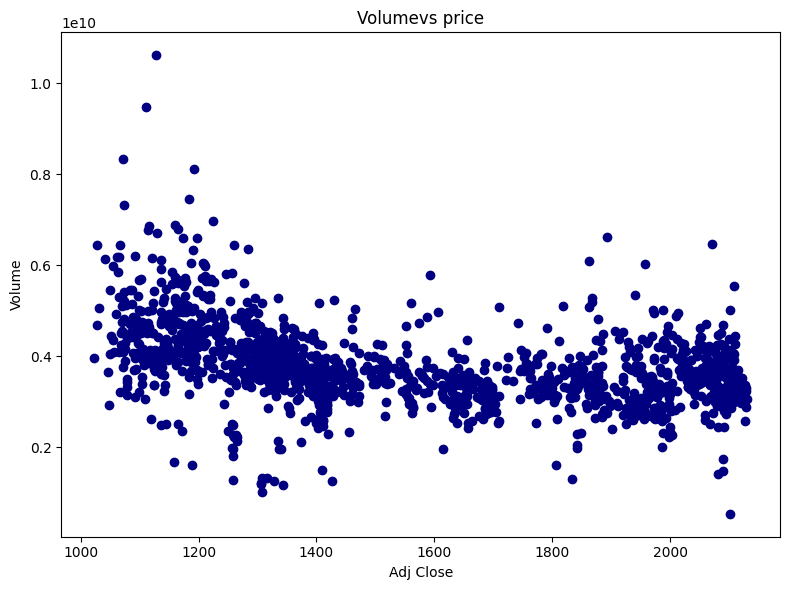

In [103]:
# Read last column name
variables = SPY_data.columns[-1:]

corr(SPY_data , variables , 1, 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


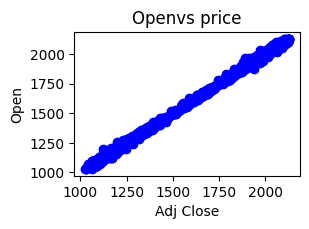

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [104]:

# Is there any correlations between open , high , low , close , adj close price?
variables = SPY_data.columns[0:4]
corr(SPY_data, variables , 3,3)

In [107]:
# correltion matrix 
SPY_data.corr()["Adj Close"].loc[df]

Open         0.999187
High         0.999637
Low          0.999702
Close        1.000000
Adj Close    1.000000
Volume      -0.408814
Name: Adj Close, dtype: float64

# Correlation
- Is there any correlation between Volume and Adj Close price?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


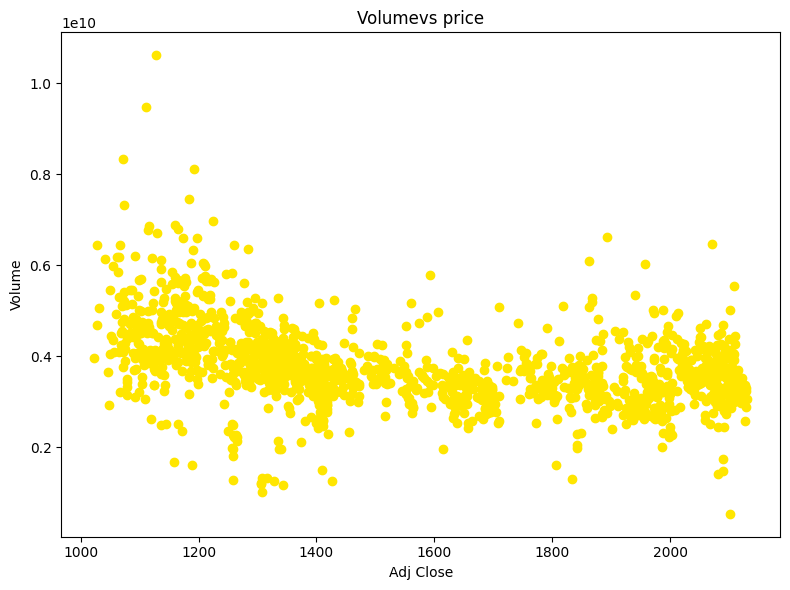

In [108]:
# read last column name
variables =SPY_data.columns[-1:] 
corr(SPY_data,variables,1,1)

### Is there any correlation between Adj Close price vs. Open, High, Low, Close?

In [110]:
# Is there any correlation between Adj Close price vs. Open, High, Low, Close?

#variables =SPY_data.columns   
#corr(SPY_data, variables,3,3)

In [111]:
SPY_data.corr()['Adj Close'].loc[variables]

Open         0.999187
High         0.999637
Low          0.999702
Close        1.000000
Adj Close    1.000000
Volume      -0.408814
Name: Adj Close, dtype: float64

# Step 5
# Feature Engineering

In [118]:
SPY_data['High-Low_pct'] = (SPY_data['High'] - SPY_data['Low']).pct_change()
SPY_data['ewm_5'] = SPY_data["Close"].ewm(span=5).mean().shift(periods=1)
SPY_data['price_std_5'] = SPY_data["Close"].rolling(center=False,window= 30).std().shift(periods=1)
 
SPY_data['volume Change'] = SPY_data['Volume'].pct_change()
SPY_data['volume_avg_5'] = SPY_data["Volume"].rolling(center=False,window=5).mean().shift(periods=1)
SPY_data['volume Close'] = SPY_data["Volume"].rolling(center=False,window=5).std().shift(periods=1)

C:\Users\3\AppData\Local\Temp\ipykernel_4288\1946963803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY_data['High-Low_pct'] = (SPY_data['High'] - SPY_data['Low']).pct_change()
C:\Users\3\AppData\Local\Temp\ipykernel_4288\1946963803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY_data['ewm_5'] = SPY_data["Close"].ewm(span=5).mean().shift(periods=1)
C:\Users\3\AppData\Local\Temp\ipykernel_4288\1946963803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

- Correlation with New features

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


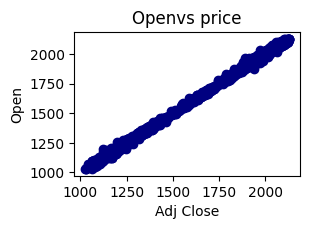

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Open         0.999174
High         0.999626
Low          0.999698
Close        1.000000
Adj Close    1.000000
Volume      -0.424194
Name: Adj Close, dtype: float64

In [119]:
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

# Take the name of the last 6 columns of the model feature
variables = SPY_data.columns[:-6]
corr(SPY_data, variables , 3,3)

# correlation matrix
SPY_data.corr()['Adj Close'].loc[df]

# Step 6
# Predictive Model


In [120]:
# check again the Null values
SPY_data.isnull().sum().loc[df]

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

- Drop/Remove NA records

In [121]:
# To train a model, it is necessary to drop missing values.
SPY_data = SPY_data.dropna(axis=0)

In [122]:

# Generate thr train test model
train = SPY_data[SPY_data.index<datetime(year= 2015 , month = 1 , day = 1)]
test = SPY_data[SPY_data.index>=datetime(year= 2015 , month = 1 , day = 1)]

dates = test.index

In [123]:
 #Create the test features dataset (X_test) which will be used to make the predictions.
X_test = test[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]].values 

# The labels of the model
Y_test = test["Adj Close"].values # will be used for comparison

In [124]:
# Regression Alogrithms
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X_train = train[['High_Low_pct' ,'ewm_5' , 'price_std_5','volume_avg_5' , 'volume Change','volume Close']]
y_train = train["Adj Close"]
lr.fit(X_train , y_train)

# Create the test feature dataset to make the prediction
X_test = test[['High_Low_pct' ,'ewm_5' , 'price_std_5','volume_avg_5' , 'volume Change','volume Close']].values

# The labels of the model
y_test = test["Adj Close"].values

close_predictions = lr.predict(X_test)


c:\Users\3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [125]:
close_predictions = lr.predict(X_test)   

c:\Users\3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Model Evaluation

Mean Absolute Error (MAE):
In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as:

mae_eq.PNG

The mean absolute error is a common measure of forecast error in time series analysis.

In [126]:
mae = sum(abs(close_predictions - test["Adj Close"].values)) / test.shape[0]
print(mae)

8.02780304067292


- Error Graph for last 25 days:

- Simple error (Actual - Predicted) computered and ploted for last 25 days.

C:\Users\3\AppData\Local\Temp\ipykernel_4288\1610410931.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')


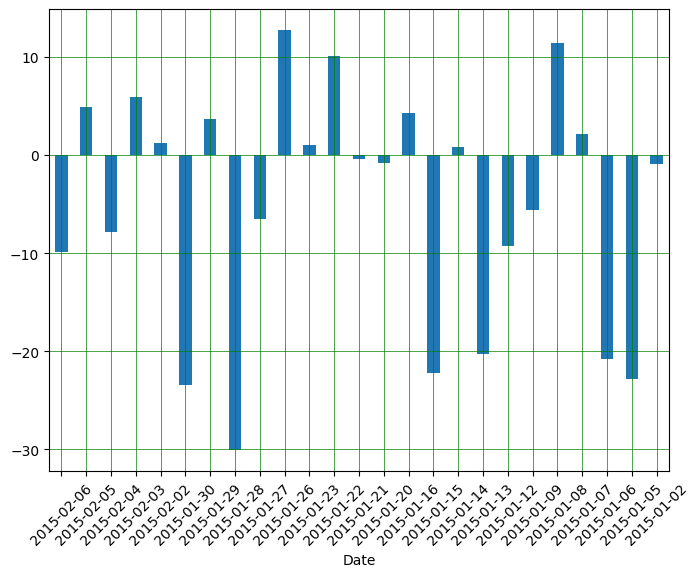

In [127]:
# Create a dataframe that output the Date, the Actual and the predicted values
df = pd.DataFrame({'Date':dates,'Actual': Y_test, 'Predicted': close_predictions})
df1 = df.tail(25)
 
# set the date with string format for plotting
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
 
df1.set_index('Date',inplace=True)
 
error = df1['Actual'] - df1['Predicted']
 
# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()